<a href="https://colab.research.google.com/github/alvinfranklyndavis/Project2023_v3/blob/main/Final_2024_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# CELL 1.1: Package Installation

# Upgrade pip and install required packages
!pip install -U pip
!pip install -U pandas gdown numpy matplotlib scikit-learn xgboost shap imbalanced-learn black


In [2]:
# CELL 1.2: Cloning GitHub Repository

# Git Configuration
!git config --global user.name "alvinfranklyndavis"
!git config --global user.email "alvinfranklyndavis@gmail.com"

# Cloning the Repository
# For a public repository:
!git clone https://github.com/alvinfranklyndavis/Project2023_v3.git

# For a private repository (use your PAT in place of YOUR_TOKEN_HERE):
# !git clone https://YOUR_TOKEN_HERE@github.com/YourUsername/YourRepository.git


fatal: destination path 'Project2023_v3' already exists and is not an empty directory.


In [14]:
# CELL 1.3: Loading and Inspecting Data

import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define file paths
train_test_data_path = '/content/drive/My Drive/Predictive_Modeling_Four_Draws/Morning_Draw_Model_Docs/1_preprocessed_train_test_data.csv'
unseen_data_path = '/content/drive/My Drive/Predictive_Modeling_Four_Draws/Morning_Draw_Model_Docs/2_preprocessed_unseen_data.csv'

# Load datasets
train_test_data = pd.read_csv(train_test_data_path)
unseen_data = pd.read_csv(unseen_data_path)

# Drop sensitive or irrelevant columns from both datasets
sensitive_columns = ['Morning', 'Afternoon', 'Evening', 'Night']  # Replace with actual sensitive column names
train_test_data.drop(columns=sensitive_columns, inplace=True, errors='ignore')
unseen_data.drop(columns=sensitive_columns, inplace=True, errors='ignore')

# Display first few rows of the datasets
print("Train/Test Data:")
print(train_test_data.head())
print("\nUnseen Data:")
print(unseen_data.head())

# Check data types and look for missing values
print("\nTrain/Test Data Info:")
print(train_test_data.info())
print("\nUnseen Data Info:")
print(unseen_data.info())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Train/Test Data:
   Row Number Data_Type  Prev_Week  Rep_Prev_Week  Prev_Entry  Rep_Prev_Entry  \
0           1  Training          7              0          23               0   
1           2  Training         11              0           9               0   
2           3  Training         19              0          12               0   
3           4  Training         35              0          35               0   
4           5  Training         18              0          16               0   

   Mov_Avg_Mor  Prev_Week.1  Rep_Prev_Week.1  Prev_Entry.1  ...  Month  Day  \
0    27.500000           13                0            19  ...      8    1   
1    19.000000           21                0            31  ...      8    2   
2    25.000000           19                0            15  ...      8    3   
3    21.666667           20                0       

Statistical Summary of Train/Test Data:
        Row Number    Prev_Week  Rep_Prev_Week   Prev_Entry  Rep_Prev_Entry  \
count  1409.000000  1409.000000    1409.000000  1409.000000     1409.000000   
mean    705.000000    18.191625       0.026969    18.122072        0.014904   
std     406.887577    10.576569       0.162052    10.370515        0.121213   
min       1.000000     0.000000       0.000000     1.000000        0.000000   
25%     353.000000     9.000000       0.000000     9.000000        0.000000   
50%     705.000000    18.000000       0.000000    18.000000        0.000000   
75%    1057.000000    27.000000       0.000000    27.000000        0.000000   
max    1409.000000    36.000000       1.000000    36.000000        1.000000   

       Mov_Avg_Mor  Prev_Week.1  Rep_Prev_Week.1  Prev_Entry.1  \
count  1409.000000  1409.000000      1409.000000   1409.000000   
mean     18.764727    18.112136         0.022001     18.766501   
std       5.745499    10.651714         0.146740  

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


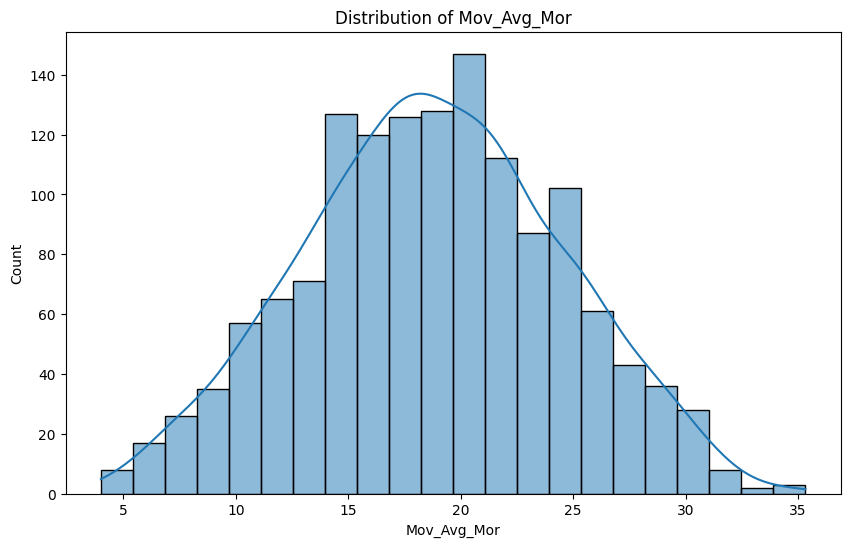

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


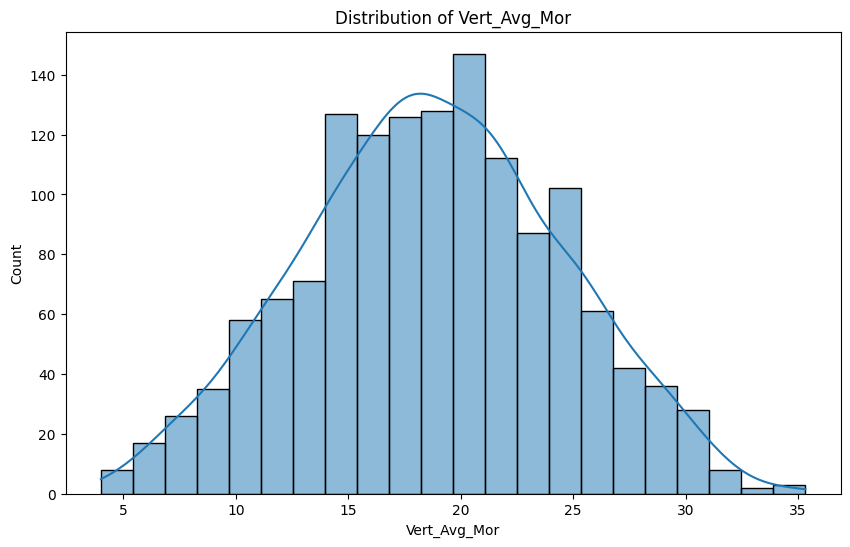

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


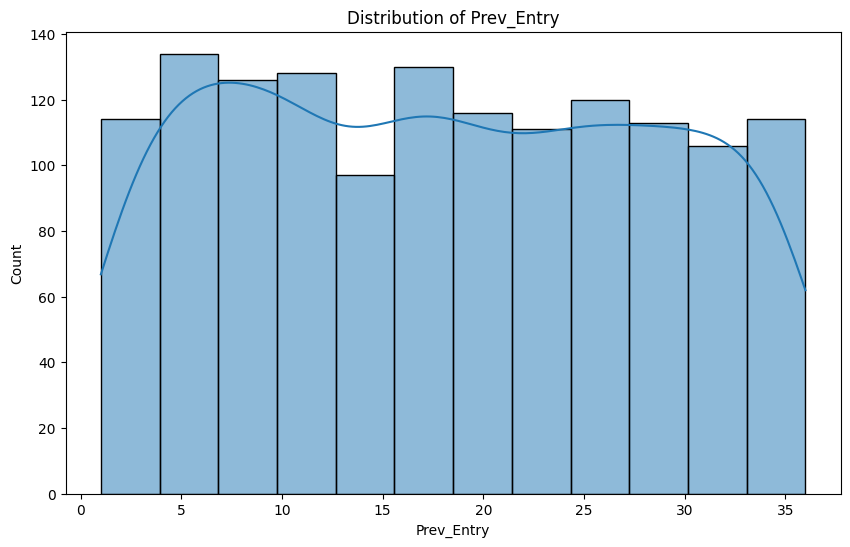

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


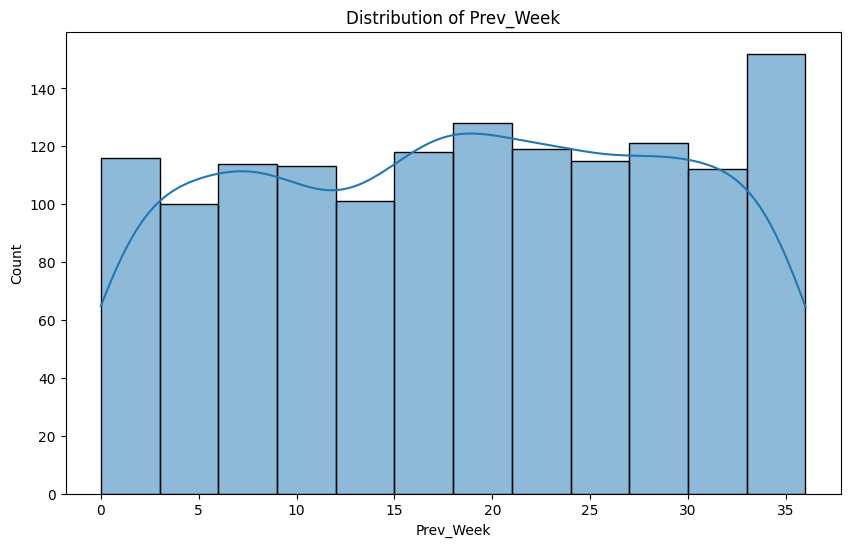

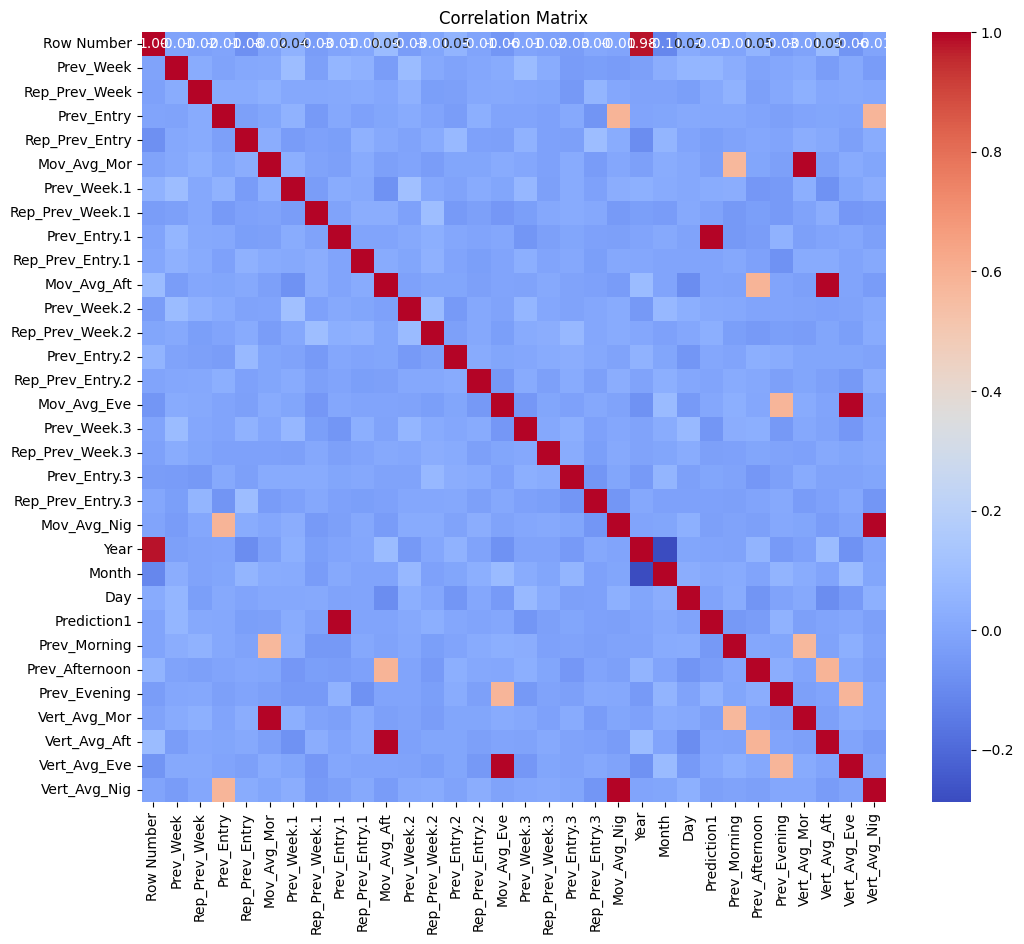

In [16]:
# CELL 1.4: Data Exploration and Analysis

# Statistical Summary
print("Statistical Summary of Train/Test Data:")
print(train_test_data.describe())
print("\nStatistical Summary of Unseen Data:")
print(unseen_data.describe())

# Check for Missing Values
print("\nMissing Values in Train/Test Data:")
print(train_test_data.isnull().sum())
print("\nMissing Values in Unseen Data:")
print(unseen_data.isnull().sum())

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  # Importing NumPy

# Histograms for features
feature_list = ['Mov_Avg_Mor', 'Vert_Avg_Mor', 'Prev_Entry', 'Prev_Week']  # Replace with actual feature names

for feature in feature_list:
    plt.figure(figsize=(10, 6))
    sns.histplot(train_test_data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Correlation Analysis (excluding non-numeric columns)
numeric_data = train_test_data.select_dtypes(include=[np.number])  # Only select numeric columns
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()


In [25]:
# CELL 2.1: Preparing the Data

from sklearn.model_selection import train_test_split

# Define relevant features to keep
relevant_features = [
    'Row Number', 'Prev_Week', 'Prev_Entry',
    'Mov_Avg_Mor', 'Vert_Avg_Mor', 'Year', 'Month', 'Day', 'Data_Type', 'Prediction1'
    # ... (list all other relevant features)
]

# Filter the datasets to include only the relevant features
train_test_data_filtered = train_test_data[relevant_features]
unseen_data_filtered = unseen_data[relevant_features]  # Also filter unseen_data

# Encode the 'Data_Type' categorical variable
train_test_data_encoded = pd.get_dummies(train_test_data_filtered, columns=['Data_Type'])

# Separate the features and target for the training/testing dataset
X = train_test_data_encoded.drop(columns=['Prediction1'])
y = train_test_data_encoded['Prediction1']

# Split the encoded data into training and validation sets based on 'Data_Type'
X_train = X[train_test_data_encoded['Data_Type_Training'] == 1]
y_train = y[train_test_data_encoded['Data_Type_Training'] == 1]
X_val = X[train_test_data_encoded['Data_Type_Testing'] == 1]
y_val = y[train_test_data_encoded['Data_Type_Testing'] == 1]

# Confirm shapes
print(f"Training Features Shape: {X_train.shape}")
print(f"Training Target Shape: {y_train.shape}")
print(f"Validation Features Shape: {X_val.shape}")
print(f"Validation Target Shape: {y_val.shape}")

# Prepare unseen data in the same way as training data
unseen_data_encoded = pd.get_dummies(unseen_data_filtered, columns=['Data_Type'])
# We only have 'Data_Type_Unseen' in the unseen data, so we drop only the 'Prediction1' column
X_unseen = unseen_data_encoded.drop(columns=['Prediction1'], errors='ignore')

# Confirm the structure
print(f"Unseen Features Shape: {X_unseen.shape}")


Training Features Shape: (1127, 10)
Training Target Shape: (1127,)
Validation Features Shape: (282, 10)
Validation Target Shape: (282,)
Unseen Features Shape: (6, 9)


In [26]:
# CELL 2.2: Training Models

from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error

# Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# XGBoost model
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=100, seed=42)
xgb_model.fit(X_train, y_train)

# Predictions on the validation set
rf_val_predictions = rf_model.predict(X_val)
xgb_val_predictions = xgb_model.predict(X_val)

# Evaluate the models using Mean Absolute Error or any other suitable metric
rf_mae = mean_absolute_error(y_val, rf_val_predictions)
xgb_mae = mean_absolute_error(y_val, xgb_val_predictions)

print(f"Random Forest MAE on Validation Set: {rf_mae}")
print(f"XGBoost MAE on Validation Set: {xgb_mae}")


Random Forest MAE on Validation Set: 9.316489361702128
XGBoost MAE on Validation Set: 10.302126650163467


In [27]:
# CELL 2.3: Ensemble Predictions

# Simple averaging
ensemble_val_predictions = (rf_val_predictions + xgb_val_predictions) / 2

# Evaluate the ensemble
ensemble_mae = mean_absolute_error(y_val, ensemble_val_predictions)
print(f"Ensemble MAE: {ensemble_mae}")


Ensemble MAE: 9.656787112687073


In [28]:
# CELL 3.1: Perform Cross-Validation

from sklearn.model_selection import cross_val_score

# Perform cross-validation on the Random Forest model
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_absolute_error')
print(f"Random Forest CV MAE scores: {-rf_cv_scores}")
print(f"Random Forest CV MAE mean: {-rf_cv_scores.mean()}")

# Perform cross-validation on the XGBoost model
xgb_cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='neg_mean_absolute_error')
print(f"XGBoost CV MAE scores: {-xgb_cv_scores}")
print(f"XGBoost CV MAE mean: {-xgb_cv_scores.mean()}")


Random Forest CV MAE scores: [8.51638298 9.21283688 9.7958156  9.41617021 9.38825623]
Random Forest CV MAE mean: 9.265892380303374
XGBoost CV MAE scores: [ 9.58821902  9.72464639 10.97958841 10.10394081 12.06198635]
XGBoost CV MAE mean: 10.491676196915314


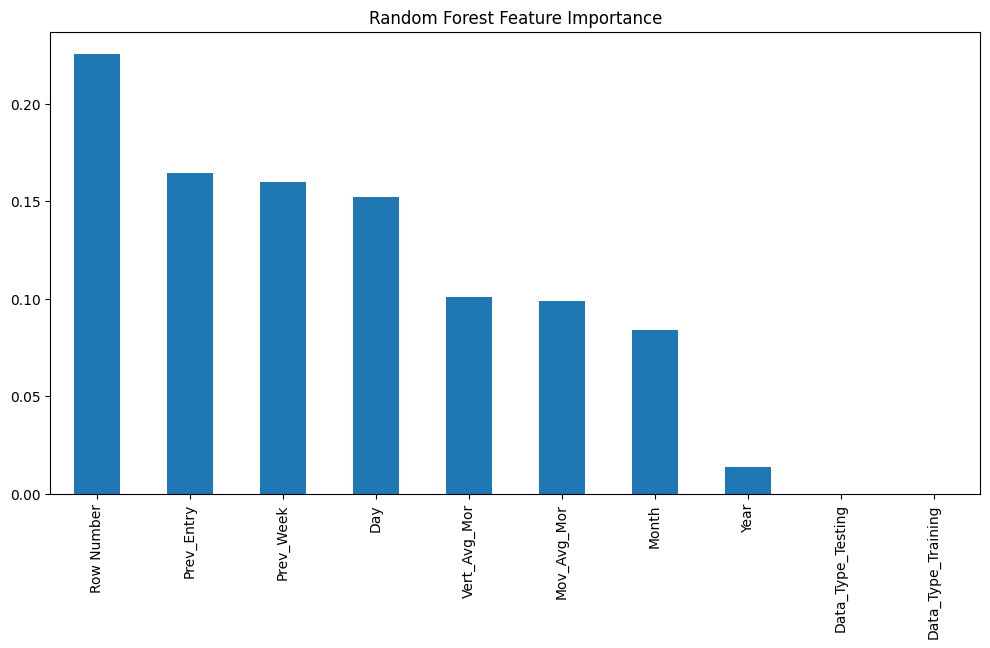

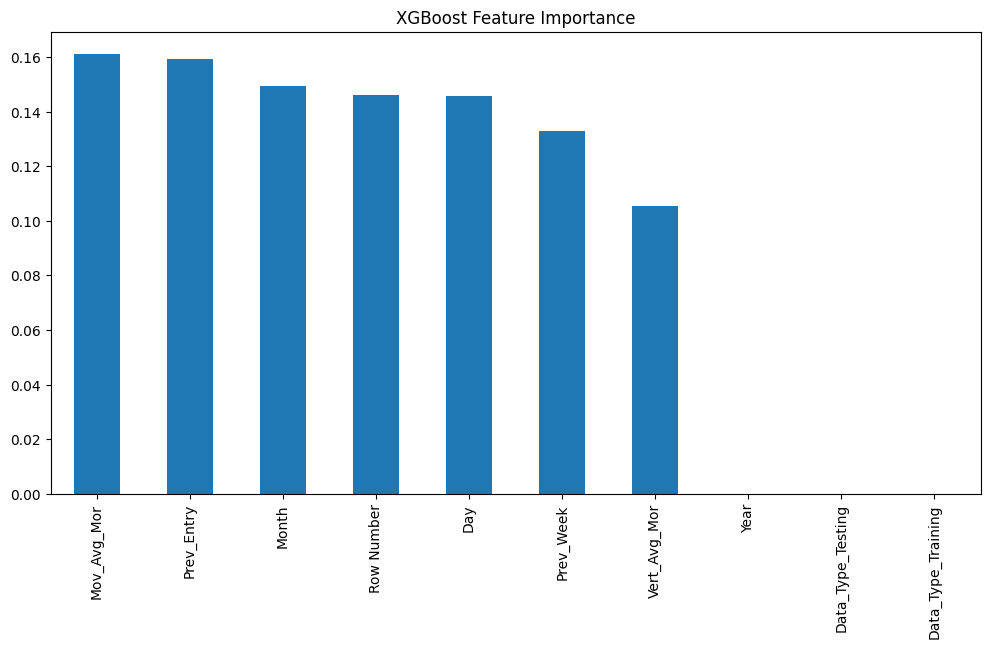

In [29]:
# CELL 3.2: Feature Importance

# Get feature importances from the Random Forest model
rf_importances = rf_model.feature_importances_
xgb_importances = xgb_model.feature_importances_

# Summarize feature importances
feature_names = X.columns
rf_feature_importance = pd.Series(rf_importances, index=feature_names).sort_values(ascending=False)
xgb_feature_importance = pd.Series(xgb_importances, index=feature_names).sort_values(ascending=False)

# Visualize feature importances
plt.figure(figsize=(12, 6))
rf_feature_importance.plot(kind='bar', title='Random Forest Feature Importance')
plt.show()

plt.figure(figsize=(12, 6))
xgb_feature_importance.plot(kind='bar', title='XGBoost Feature Importance')
plt.show()


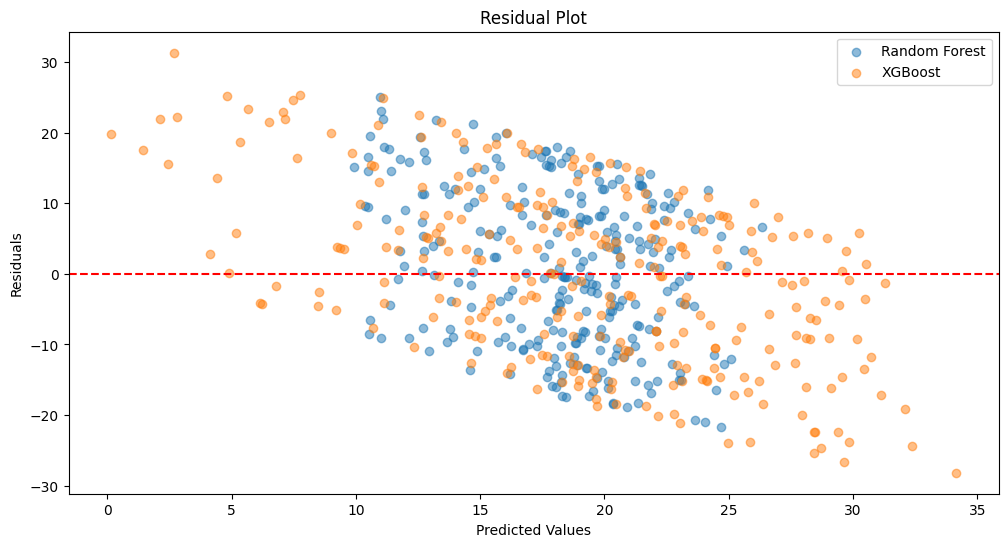

In [30]:
# CELL 3.3: Residual Analysis

# Calculate residuals
rf_residuals = y_val - rf_val_predictions
xgb_residuals = y_val - xgb_val_predictions

# Plot residuals
plt.figure(figsize=(12, 6))
plt.scatter(rf_val_predictions, rf_residuals, alpha=0.5, label='Random Forest')
plt.scatter(xgb_val_predictions, xgb_residuals, alpha=0.5, label='XGBoost')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.legend()
plt.show()


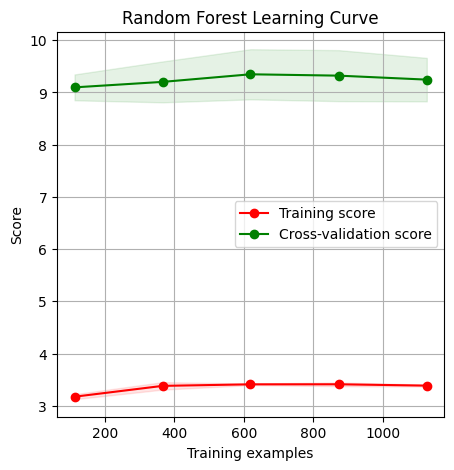

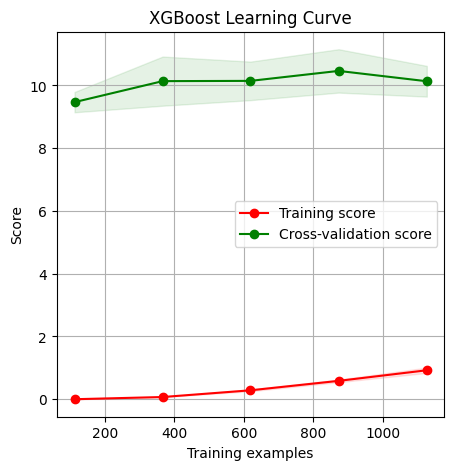

In [31]:
# CELL 3.4: Learning Curves

from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None, n_jobs=None, scoring='neg_mean_absolute_error'):
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(5, 5))

    axes.set_title(title)
    if ylim is not None:  # Corrected this line
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, scoring=scoring, train_sizes=np.linspace(.1, 1.0, 5))
    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    axes.legend(loc="best")

    return plt

# Make sure you import numpy as np and matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

plot_learning_curve(rf_model, "Random Forest Learning Curve", X, y, cv=5)
plot_learning_curve(xgb_model, "XGBoost Learning Curve", X, y, cv=5)
plt.show()


In [12]:
# Check if 'Prediction1' is in train_test_data
if 'Prediction1' in train_test_data.columns:
    print("Column 'Prediction1' found in train_test_data.")
    # Proceed with your existing code
else:
    print("Column 'Prediction1' not found. Please check preprocessing steps.")


Column 'Prediction1' found in train_test_data.


In [13]:
# CELL 2.1: Saving Preprocessed Data

# Define the paths to save the preprocessed data
preprocessed_train_test_path = os.path.join(drive_dataset_directory, '7_preprocessed_train_test_data.csv')
preprocessed_train_test_target_path = os.path.join(drive_dataset_directory, '4_train_test_target.csv')
preprocessed_unseen_path = os.path.join(drive_dataset_directory, '8_preprocessed_unseen_data.csv')
preprocessed_unseen_target_path = os.path.join(drive_dataset_directory, '6_unseen_target.csv')

# Save preprocessed training/testing data
train_test_data.to_csv(preprocessed_train_test_path, index=False)
logger.info("Preprocessed training/testing data saved to Google Drive.")

# Save preprocessed unseen data
unseen_data.to_csv(preprocessed_unseen_path, index=False)
unseen_target = unseen_data[['Prediction1']]
unseen_data.drop(columns=['Prediction1'], inplace=True)
unseen_target.to_csv(preprocessed_unseen_target_path, index=False)
logger.info("Preprocessed unseen data and target saved to Google Drive.")

# Print the first few rows of the preprocessed training/testing data for visual confirmation
print("First few rows of the preprocessed training/testing data:")
print(train_test_data.head())
print("\nFirst few rows of the preprocessed training/testing target:")
print(train_test_target.head())

# Print the first few rows of the preprocessed unseen data for visual confirmation
print("\nFirst few rows of the preprocessed unseen data:")
print(unseen_data.head())
print("\nFirst few rows of the preprocessed unseen target:")
print(unseen_target.head())

# Optionally, print the shape and column names for further confirmation
print("\nShape of the training/testing data DataFrame:", train_test_data.shape)
print("Column names:", train_test_data.columns)
print("Shape of the training/testing target DataFrame:", train_test_target.shape)
print("Column names:", train_test_target.columns)
print("Shape of the unseen data DataFrame:", unseen_data.shape)
print("Column names:", unseen_data.columns)
print("Shape of the unseen target DataFrame:", unseen_target.shape)
print("Column names:", unseen_target.columns)

# [Continue with further data processing...]


NameError: name 'os' is not defined

In [ ]:
# CELL 2.2: Feature Finalization and Saving for Model Input

def finalize_and_save_features(data, filename_suffix, file_number):
    logger.info(f"Finalizing features for model input and saving processed data for {filename_suffix}")

    # Ensure 'Morning' is not in the columns to be processed
    if 'Morning' in data.columns:
        data.drop(columns=['Morning'], inplace=True)

    selected_columns = ['Year', 'Month', 'Day', 'Prev_Week', 'Prev_Entry', 'Mov_Avg_Mor', 'Prev_Morning', 'Prev_Afternoon', 'Prev_Evening']
    X = data[selected_columns]

    # Save the processed data features to CSV
    file_name = f'{file_number}_{filename_suffix}_features.csv'
    file_path = os.path.join(drive_dataset_directory, file_name)
    X.to_csv(file_path, index=False)
    logger.info(f"Processed data features for {filename_suffix} saved as {file_name}.")

    # Print the first few rows for verification
    print(f"First few rows of {filename_suffix} features:")
    print(X.head())

# Update the path dictionary to include the correct paths
data_paths = {
    "train_test_features": '/content/drive/My Drive/Predictive_Modeling_Four_Draws/Morning_Draw_Model_Docs/7_preprocessed_train_test_data.csv',
    "unseen_data": '/content/drive/My Drive/Predictive_Modeling_Four_Draws/Morning_Draw_Model_Docs/8_preprocessed_unseen_data.csv'
}

# Apply to training/testing data
finalize_and_save_features(train_test_data, 'train_test', '9')

# Ensure unseen data is preprocessed before applying the function
unseen_data = preprocess_unseen_data(pd.read_csv(data_paths["unseen_data"]))
finalize_and_save_features(unseen_data, 'unseen', '10')


In [ ]:
# CELL 3.1: Additional Data Insights for CSVs

import pandas as pd
import logging

# Set up logging
logger = logging.getLogger(__name__)
logger.info("Exploring additional data insights for CSVs...")

# Define the directory for datasets in Google Drive
drive_dataset_directory = '/content/drive/My Drive/Predictive_Modeling_Four_Draws/Morning_Draw_Model_Docs/'

# Read the CSV files with updated paths
train_test_features = pd.read_csv(drive_dataset_directory + '9_train_test_features.csv')
train_test_target = pd.read_csv(drive_dataset_directory + '4_train_test_target.csv')
unseen_features = pd.read_csv(drive_dataset_directory + '10_unseen_features.csv')
unseen_target = pd.read_csv(drive_dataset_directory + '6_unseen_target.csv')

# Function to print data insights
def print_data_insights(df, df_name):
    print(f"Data Insights for {df_name}:\n")
    print("Missing values in each column:")
    print(df.isnull().sum())

    print("\nPercentage of missing values in each column:")
    print(df.isnull().mean() * 100)

    print("\nSummary statistics:")
    print(df.describe())

    print("\nFirst few rows of data:")
    print(df.head())

    print("\n-----------------------------------------\n")

# Print insights for each DataFrame
print_data_insights(train_test_features, "Train/Test Features")
print_data_insights(train_test_target, "Train/Test Target")
print_data_insights(unseen_features, "Unseen Features")
print_data_insights(unseen_target, "Unseen Target")


In [ ]:
# CELL 3.2: Setting Bounds for Numerical Range and Preparing Data for Prediction

import numpy as np
import pandas as pd
import logging

# Set up logging
logger = logging.getLogger(__name__)

try:
    # Corrected path for loading the dataset
    data_path = '/content/drive/My Drive/Predictive_Modeling_Four_Draws/Morning_Draw_Model_Docs/7_preprocessed_train_test_data.csv'
    data = pd.read_csv(data_path)
    logger.info("Dataset loaded successfully.")

    logger.info("Enforcing numerical bounds...")

    # Define all columns that should have values in the range of 1 to 36
    columns_to_check = [
        'Morning', 'Prev_Week', 'Prev_Entry', 'Mov_Avg_Mor', 'Afternoon',
        'Prev_Week.1', 'Prev_Entry.1', 'Mov_Avg_Aft', 'Evening', 'Prev_Week.2',
        'Prev_Entry.2', 'Mov_Avg_Eve', 'Night', 'Prev_Week.3', 'Prev_Entry.3',
        'Mov_Avg_Nig', 'Prev_Morning', 'Prev_Afternoon', 'Prev_Evening', 'Prediction1'
    ]

    # Loop through these columns and enforce the range if they exist in the DataFrame
    for col in columns_to_check:
        if col in data.columns:
            # Find values outside the range and enforce the range by clipping values
            data[col] = data[col].clip(lower=1, upper=36)

    # Ensure changes are reflected
    print(data.describe())

    # Prepare the current data with NaNs in 'Prediction1' for testing
    selected_columns = ['Year', 'Month', 'Day', 'Prev_Week', 'Prev_Entry', 'Mov_Avg_Mor', 'Prev_Morning', 'Prev_Afternoon', 'Prev_Evening']
    current_data = data[selected_columns].copy()  # Use .copy() to create an independent copy
    current_data['Prediction1'] = np.nan  # Initialize 'Prediction1' with NaN

    # After initializing 'Prediction1' with NaN
    print("\nFirst few rows of current data with 'Prediction1' initialized as NaN:")
    print(current_data.head())

    # Display Row 1406 (End of Testing Data)
    print("Row 1406 (End of Testing Data):")
    print(data.iloc[1406])  # Remember, Python indexing starts at 0

    # Corrected filename to avoid conflict and match naming convention
    prepared_current_data_path = '/content/drive/My Drive/Predictive_Modeling_Four_Draws/Morning_Draw_Model_Docs/11_prepared_current_data_for_prediction1.csv'
    current_data.to_csv(prepared_current_data_path, index=False)
    logger.info("Prepared current data saved to Google Drive.")

    # Confirming the file saving by reading and displaying the first few rows
    logger.info("Verifying saved prepared current data:")
    saved_current_data = pd.read_csv(prepared_current_data_path)
    print(saved_current_data.head())

except Exception as e:
    logger.error(f"An error occurred: {e}")


In [ ]:
# CELL 4.1: Data Preparation for Prediction

import pandas as pd
import numpy as np
import logging

logger = logging.getLogger(__name__)

# Define the preprocessing function for feature datasets
def preprocess_features(data):
    """Preprocess feature data."""
    logger.info("Starting preprocessing for feature dataset")

    # Check if 'Date' column exists and convert it to datetime, then extract 'Year', 'Month', 'Day'
    if 'Date' in data.columns:
        data['Date'] = pd.to_datetime(data['Date'])
        data['Year'] = data['Date'].dt.year
        data['Month'] = data['Date'].dt.month
        data['Day'] = data['Date'].dt.day
        data.drop('Date', axis=1, inplace=True)  # Drop the 'Date' column after extraction

    # Select relevant columns
    selected_columns = ['Year', 'Month', 'Day', 'Prev_Week', 'Prev_Entry', 'Mov_Avg_Mor', 'Prev_Morning', 'Prev_Afternoon', 'Prev_Evening']
    data = data[selected_columns]

    return data

# Paths to CSV files
paths = {
    "train_test_features": '/content/drive/My Drive/Predictive_Modeling_Four_Draws/Morning_Draw_Model_Docs/3_train_test_features.csv',
    "train_test_target": '/content/drive/My Drive/Predictive_Modeling_Four_Draws/Morning_Draw_Model_Docs/4_train_test_target.csv',
    "unseen_features": '/content/drive/My Drive/Predictive_Modeling_Four_Draws/Morning_Draw_Model_Docs/5_unseen_features.csv',
    "unseen_target": '/content/drive/My Drive/Predictive_Modeling_Four_Draws/Morning_Draw_Model_Docs/6_unseen_target.csv'
}

# Load and preprocess feature datasets
X_train_test = preprocess_features(pd.read_csv(paths["train_test_features"]))
X_unseen = preprocess_features(pd.read_csv(paths["unseen_features"]))

# Load target datasets without preprocessing
y_train_test = pd.read_csv(paths["train_test_target"])
y_unseen = pd.read_csv(paths["unseen_target"])

# Quick check of data structures
logger.info("Train/Test Features Shape: %s, Unseen Features Shape: %s", X_train_test.shape, X_unseen.shape)
logger.info("Train/Test Target Shape: %s, Unseen Target Shape: %s", y_train_test.shape, y_unseen.shape)

# Further processing (if necessary)
# Example: Feature scaling, handling categorical variables, etc.

# Prepare for unseen data processing (to be done at a later stage)


In [ ]:
# CELL 4.2: Data Preparation for Prediction Continued
# ... [previous setup and preprocessing code] ...

# Load and preprocess feature datasets
X_train_test = preprocess_features(pd.read_csv(paths["train_test_features"]))
X_unseen = preprocess_features(pd.read_csv(paths["unseen_features"]))

# Load target datasets without preprocessing
y_train_test = pd.read_csv(paths["train_test_target"])
y_unseen = pd.read_csv(paths["unseen_target"])

# Quick integrity check at the end
print("\nIntegrity Check for Train/Test Features")
print("Shape of Features:", X_train_test.shape)
print("First few rows of Features:")
print(X_train_test.head())

print("\nIntegrity Check for Train/Test Target")
print("Shape of Target:", y_train_test.shape)
print("First few rows of Target:")
print(y_train_test.head())

print("\nIntegrity Check for Unseen Features")
print("Shape of Features:", X_unseen.shape)
print("First few rows of Features:")
print(X_unseen.head())

print("\nIntegrity Check for Unseen Target")
print("Shape of Target:", y_unseen.shape)
print("First few rows of Target:")
print(y_unseen.head())


In [ ]:
# CELL 5.1: Model Training, Prediction, and Unseen Data Loading
import pandas as pd
import numpy as np
import logging
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import joblib

logger = logging.getLogger(__name__)

# Define relevant columns
relevant_columns = ['Year', 'Month', 'Day', 'Prev_Week', 'Prev_Entry', 'Mov_Avg_Mor', 'Prev_Morning', 'Prev_Afternoon', 'Prev_Evening']

def train_and_evaluate_model(X_train, y_train, X_val, y_val):
    """Train Random Forest model and evaluate it on validation data."""
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train.values.ravel())
    logger.info("Random Forest model trained.")

    y_val_pred = model.predict(X_val)
    logger.info(f"Validation MSE: {mean_squared_error(y_val, y_val_pred)}, R2 Score: {r2_score(y_val, y_val_pred)}")
    return model

# Paths to data
data_paths = {
    "train_test_features": '/content/drive/My Drive/Predictive_Modeling_Four_Draws/Morning_Draw_Model_Docs/3_train_test_features.csv',
    "train_test_target": '/content/drive/My Drive/Predictive_Modeling_Four_Draws/Morning_Draw_Model_Docs/4_train_test_target.csv',
    "current_data": '/content/drive/My Drive/Predictive_Modeling_Four_Draws/Morning_Draw_Model_Docs/7_prepared_current_data_for_prediction1.csv',
    "original_unseen_data": '/content/drive/My Drive/Predictive_Modeling_Four_Draws/Morning_Draw_Model_Docs/2_Model_Unseen_Data.csv'
}

# Load and preprocess feature datasets
X_train_test = pd.read_csv(data_paths["train_test_features"])[relevant_columns]
y_train_test = pd.read_csv(data_paths["train_test_target"])
X_unseen = pd.read_csv(data_paths["original_unseen_data"])[relevant_columns]

# Split train_test data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_test, y_train_test, test_size=0.3, random_state=42)

# Train and evaluate model
model = train_and_evaluate_model(X_train, y_train, X_val, y_val)

# Save the model
model_filename = '/content/drive/My Drive/Predictive_Modeling_Four_Draws/Morning_Draw_Model_Docs/14_random_forest_model.pkl'
joblib.dump(model, model_filename)
logger.info("Model saved to Google Drive.")

# Load current data for prediction
current_data = pd.read_csv(data_paths["current_data"])

# Predict and save current data
current_data['Prediction1'] = np.round(model.predict(current_data[relevant_columns]))
current_data_predictions_path = '/content/drive/My Drive/Predictive_Modeling_Four_Draws/Morning_Draw_Model_Docs/12_current_data_predictions.csv'
current_data.to_csv(current_data_predictions_path, index=False)
logger.info("Current data predictions saved.")

# Load original unseen data for prediction
original_unseen_data = pd.read_csv(data_paths["original_unseen_data"])

# Predict unseen data
original_unseen_data['Prediction1'] = model.predict(X_unseen)
unseen_data_predictions_path = '/content/drive/My Drive/Predictive_Modeling_Four_Draws/Morning_Draw_Model_Docs/13_unseen_data_predictions.csv'
original_unseen_data.to_csv(unseen_data_predictions_path, index=False)
logger.info("Unseen data predictions saved.")


In [ ]:
# CELL 6.1: Displaying Predictions for Current and Unseen Data

import pandas as pd

# Include 'Prediction1' in the relevant columns
relevant_columns = ['Year', 'Month', 'Day', 'Prev_Week', 'Prev_Entry', 'Mov_Avg_Mor', 'Prev_Morning', 'Prev_Afternoon', 'Prev_Evening', 'Prediction1']

# Load and filter the current data with predictions
current_data_with_predictions_path = '/content/drive/My Drive/Predictive_Modeling_Four_Draws/Morning_Draw_Model_Docs/12_current_data_predictions.csv'
current_data_with_predictions = pd.read_csv(current_data_with_predictions_path)[relevant_columns]
print("Filtered first few rows of current data with predictions:")
print(current_data_with_predictions.head())

# Load and filter the unseen data with predictions
unseen_data_with_predictions_path = '/content/drive/My Drive/Predictive_Modeling_Four_Draws/Morning_Draw_Model_Docs/13_unseen_data_predictions.csv'
unseen_data_with_predictions = pd.read_csv(unseen_data_with_predictions_path)[relevant_columns]
print("\nFiltered first few rows of unseen data with predictions:")
print(unseen_data_with_predictions.head())


In [ ]:
# CELL 6.2: Enhanced NaN Check and Handling in 'Prediction1'

import pandas as pd
import logging

logger = logging.getLogger(__name__)

logger.info("Enhanced NaN handling in 'Prediction1'...")

# Update relevant columns to include 'Prediction1'
relevant_columns = ['Year', 'Month', 'Day', 'Prev_Week', 'Prev_Entry', 'Mov_Avg_Mor', 'Prev_Morning', 'Prev_Afternoon', 'Prev_Evening', 'Prediction1']

# Load the current data with predictions
current_data_with_predictions = pd.read_csv('/content/drive/My Drive/Predictive_Modeling_Four_Draws/Morning_Draw_Model_Docs/12_current_data_predictions.csv')[relevant_columns]

# Forward fill NaNs in the first row using the recommended method
current_data_with_predictions.iloc[0] = current_data_with_predictions.iloc[0].ffill()

# Print the first few rows to verify NaN handling
print("First few rows of filtered current data after NaN handling:\n", current_data_with_predictions.head())

# Check for NaN values in 'Prediction1'
nan_count_prediction1 = current_data_with_predictions['Prediction1'].isnull().sum()
logger.info(f"Number of NaN values in 'Prediction1': {nan_count_prediction1}")

if nan_count_prediction1 > 0:
    logger.warning("NaNs detected in 'Prediction1'. Here are the details:")
    nan_rows = current_data_with_predictions[current_data_with_predictions['Prediction1'].isnull()]
    print("Rows with NaN in 'Prediction1':\n", nan_rows)
else:
    print("No NaN values found in 'Prediction1'.")


In [ ]:
# CELL 7.1: Model Interpretation with SHAP
import joblib
import shap
import matplotlib.pyplot as plt

# Assuming the path to your saved model and prepared dataset
model_path = '/path/to/your/random_forest_model.pkl'  # Update with the correct path
X_val_path = '/path/to/your/validation_dataset.csv'   # Update with the correct path

# Load your trained RandomForest model
model = joblib.load(model_path)

# Load your validation dataset (assuming it's a CSV file)
X_val = pd.read_csv(X_val_path)

# Initialize the SHAP explainer with the loaded model
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for the validation dataset
shap_values = explainer.shap_values(X_val)

# Plot the summary of SHAP values
shap.summary_plot(shap_values, X_val, plot_type='bar')

# Optionally, you can also plot a summary plot of SHAP values for all features
shap.summary_plot(shap_values, X_val)


In [ ]:
# Cell 4.1. Model Interpretation

import shap
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

logger = logging.getLogger(__name__)

# Load the finalized model
final_model = joblib.load('/content/drive/My Drive/Predictive_Modeling_Four_Draws/random_forest_prediction_model.pkl')

logger.info("Interpreting the model with SHAP values...")

# Assuming X_val is already prepared in previous cells
# Using SHAP to interpret the model
explainer = shap.TreeExplainer(final_model)
shap_values = explainer.shap_values(X_val)
shap.summary_plot(shap_values, X_val, plot_type="bar")

# STEP 4.2. FINAL MODEL SELECTION AND REPORTING

logger.info("Evaluating final model performance with regression metrics...")

# Flatten y_val to ensure it's 1-dimensional
y_val_flat = y_val.values.ravel() if isinstance(y_val, pd.DataFrame) else y_val

# Generate predictions for the validation set
y_pred_val = final_model.predict(X_val)
y_pred_val_rounded = np.round(y_pred_val)

# Flatten y_pred_val_rounded to ensure it's 1-dimensional
y_pred_val_flat = y_pred_val_rounded.ravel() if isinstance(y_pred_val_rounded, pd.DataFrame) else y_pred_val_rounded

# Create the DataFrame
predictions_df = pd.DataFrame({'Actual': y_val_flat, 'Predicted': y_pred_val_flat})

# Save the DataFrame as CSV
predictions_df.to_csv('/content/drive/My Drive/Predictive_Modeling_Four_Draws/predictions_df.csv', index=False)

# Calculate Mean Squared Error (MSE) and R2 Score for the validation set
mse_val = mean_squared_error(y_val_flat, y_pred_val_flat)
r2_val = r2_score(y_val_flat, y_pred_val_flat)

logger.info(f"Validation MSE: {mse_val}, R2 Score: {r2_val}")

logger.info(f"Regression Metrics:\nMSE: {mse_val}\nR2 Score: {r2_val}")

# STEP 4.3. PREPARATION FOR DEPLOYMENT

# ...[Include steps for preparing the model for deployment]...

# STEP 4.4. DOCUMENTATION AND REPORTING

# ...[Prepare a comprehensive report on the model's performance, limitations, and deployment steps]...

logger.info("Model documentation and reporting completed.")

# Final Checks and Tests (if applicable)
# ...[Include any final testing or checks before deployment]...

logger.info("Final checks and tests completed.")
logger.info("Cell 4 tasks completed successfully.")


In [ ]:
# Cell 5. Cross-Validation and  additional metrics analysis

from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import joblib
import shap
import logging

logger = logging.getLogger(__name__)

# Assuming you are using RandomForestRegressor as your model
model = RandomForestRegressor(random_state=42)

# Define your scoring metrics for regression
scoring_metrics = {
    'MSE': make_scorer(mean_squared_error, greater_is_better=False),
    'R2': make_scorer(r2_score)
}
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

# Assuming 'data' is sorted by date and 'model' is your trained model
tscv = TimeSeriesSplit(n_splits=5)

for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)  # Train your model
    predictions = model.predict(X_test)  # Make predictions

    mse = mean_squared_error(y_test, predictions)  # Calculate MSE
    print(f"MSE for the current fold: {mse}")

# Given the list of MSE scores from each fold
mse_scores = [3.4702196581196585, 1.9403478632478632, 1.051690170940171, 0.7291717948717948, 0.4926722222222223]

# Calculate the average MSE
average_mse = sum(mse_scores) / len(mse_scores)
print(f"Average MSE across all folds: {average_mse}")

# Perform 10-fold cross-validation
k_folds = 10  # Number of folds
cv_results = {}
for metric_name, scorer in scoring_metrics.items():
    scores = cross_val_score(model, X, y.fillna(y.mean()), scoring=scorer, cv=k_folds)
    cv_results[metric_name] = scores
    logger.info(f"{metric_name} scores for each fold: {scores}")
    logger.info(f"Average {metric_name} over {k_folds} folds: {np.mean(scores)}")

# Additional metrics analysis and error/bias exploration
# ... Add your code for detailed analysis of errors, biases, etc. ...
logger.info("Cross-validation and additional metrics analysis completed.")

# Feature Importance Analysis using SHAP
# Assuming 'final_model' is your trained RandomForestRegressor model

# Load the trained model (if not already loaded)
final_model = joblib.load('/content/drive/My Drive/Predictive_Modeling_Four_Draws/random_forest_prediction_model.pkl')

# Explain the model's predictions using SHAP
explainer = shap.TreeExplainer(final_model)
shap_values = explainer.shap_values(X)

# Plot summary plot using SHAP values
shap.summary_plot(shap_values, X)

logger.info("Feature importance analysis using SHAP completed.")


In [ ]:
# Cell 6. Detailed error and bias analysis

import pandas as pd
import matplotlib.pyplot as plt
import logging
from google.colab import drive

# Set up logging
logger = logging.getLogger(__name__)

# Ensure Google Drive is mounted
drive.mount('/content/drive', force_remount=True)

# Define the path in Google Drive where the predictions DataFrame is saved
predictions_df_path = '/content/drive/My Drive/Predictive_Modeling_Four_Draws/predictions_df.csv'

# Load or create the predictions DataFrame
if os.path.exists(predictions_df_path):
    predictions_df = pd.read_csv(predictions_df_path)
else:
    # Assuming predictions were made in a previous step and saved as 'predictions_df.csv'
    raise FileNotFoundError("predictions_df.csv not found. Ensure it's created in previous steps.")

logger.info("Predictions DataFrame loaded successfully for error and bias analysis.")
print(predictions_df.columns)

# Error Analysis
predictions_df['Error'] = predictions_df['Predicted'] - predictions_df['Actual']
predictions_df['Absolute_Error'] = predictions_df['Error'].abs()

# Plotting error distribution
plt.hist(predictions_df['Error'], bins=30)
plt.title('Error Distribution')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.show()

# Subgroup Analysis
# Ensure that 'Prev_Week' and 'Prev_Entry' are in predictions_df
if 'Prev_Week' in predictions_df and 'Prev_Entry' in predictions_df:
    # Subgroup analysis based on 'Prev_Week'
    prev_week_performance = predictions_df.groupby('Prev_Week').mean()['Absolute_Error']
    prev_week_performance.plot(kind='bar', figsize=(10, 6))
    plt.title('Performance by Previous Week')
    plt.xlabel('Previous Week')
    plt.ylabel('Average Absolute Error')
    plt.show()

    # Subgroup analysis based on 'Prev_Entry'
    prev_entry_performance = predictions_df.groupby('Prev_Entry').mean()['Absolute_Error']
    prev_entry_performance.plot(kind='bar', figsize=(10, 6))
    plt.title('Performance by Previous Entry')
    plt.xlabel('Previous Entry')
    plt.ylabel('Average Absolute Error')
    plt.show()

# Document findings
error_bias_report = """
Detailed Error Analysis:
- Error Distribution Insights: {'Describe your findings from the error distribution here'}
- Largest Errors: {'Describe characteristics of instances with largest errors here'}

Bias Exploration:
- Performance by Previous Week: {'Describe performance variations based on the previous week here'}
- Performance by Previous Entry: {'Describe performance variations based on the previous entry here'}
"""

logger.info("Error and bias analysis completed.")
logger.info(error_bias_report)


In [ ]:
# Cell 7. Final review, deployment preparation, and documentation

import joblib
import logging

logger = logging.getLogger(__name__)

# Final Model Review and Refinement
# ... Code/comments for any last adjustments to the model ...

# Deployment Preparation
# Serialize the final model
# Ensure that 'final_model' is the variable name for your trained model to be deployed
final_model_path = '/content/drive/My Drive/Predictive_Modeling_Four_Draws/random_forest_prediction_model.pkl'
joblib.dump(final_model, final_model_path)
logger.info(f"Final model serialized and saved for deployment at: {final_model_path}")

# Comprehensive Documentation Update
# ... Update your comprehensive report with all final findings and methodologies ...
# Include details on model performance, SHAP interpretation, error analysis, etc.

# Final Checks and Tests
# ... Code/comments for final tests and checks to ensure model is ready for deployment ...

# Planning for Future Improvements
# Describe areas where further research could be beneficial, and methodologies to explore in future iterations of the project
future_improvement_plan = """
Future Improvement Plans:
- Areas for further research: {describe areas where additional data, feature engineering, or alternative modeling techniques could be explored}
- Methodologies to explore: {describe potential methodologies, like deep learning or ensemble methods, for future iterations}
"""

logger.info("Final review and deployment preparation completed.")
logger.info(future_improvement_plan)


# New Section

# New Section